In [134]:
import pywt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# 1. Generate a real chirp signal. Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components.

Function definition of Chirp signal

In [135]:
def chirp(t,f0,f1,t1,A):
    #f(t) = f0 + c*t where c=(f1-f0)/t1
    c = (f1-f0)/t1
    #ph(t) = 2*pi*(0.5*c*t^2+f0*t)
    ph = (2*np.pi)*((0.5*c*np.square(t))+(f0*t))
    x = A*np.sin(ph)
    return x

Generation and plotting of chirp signal

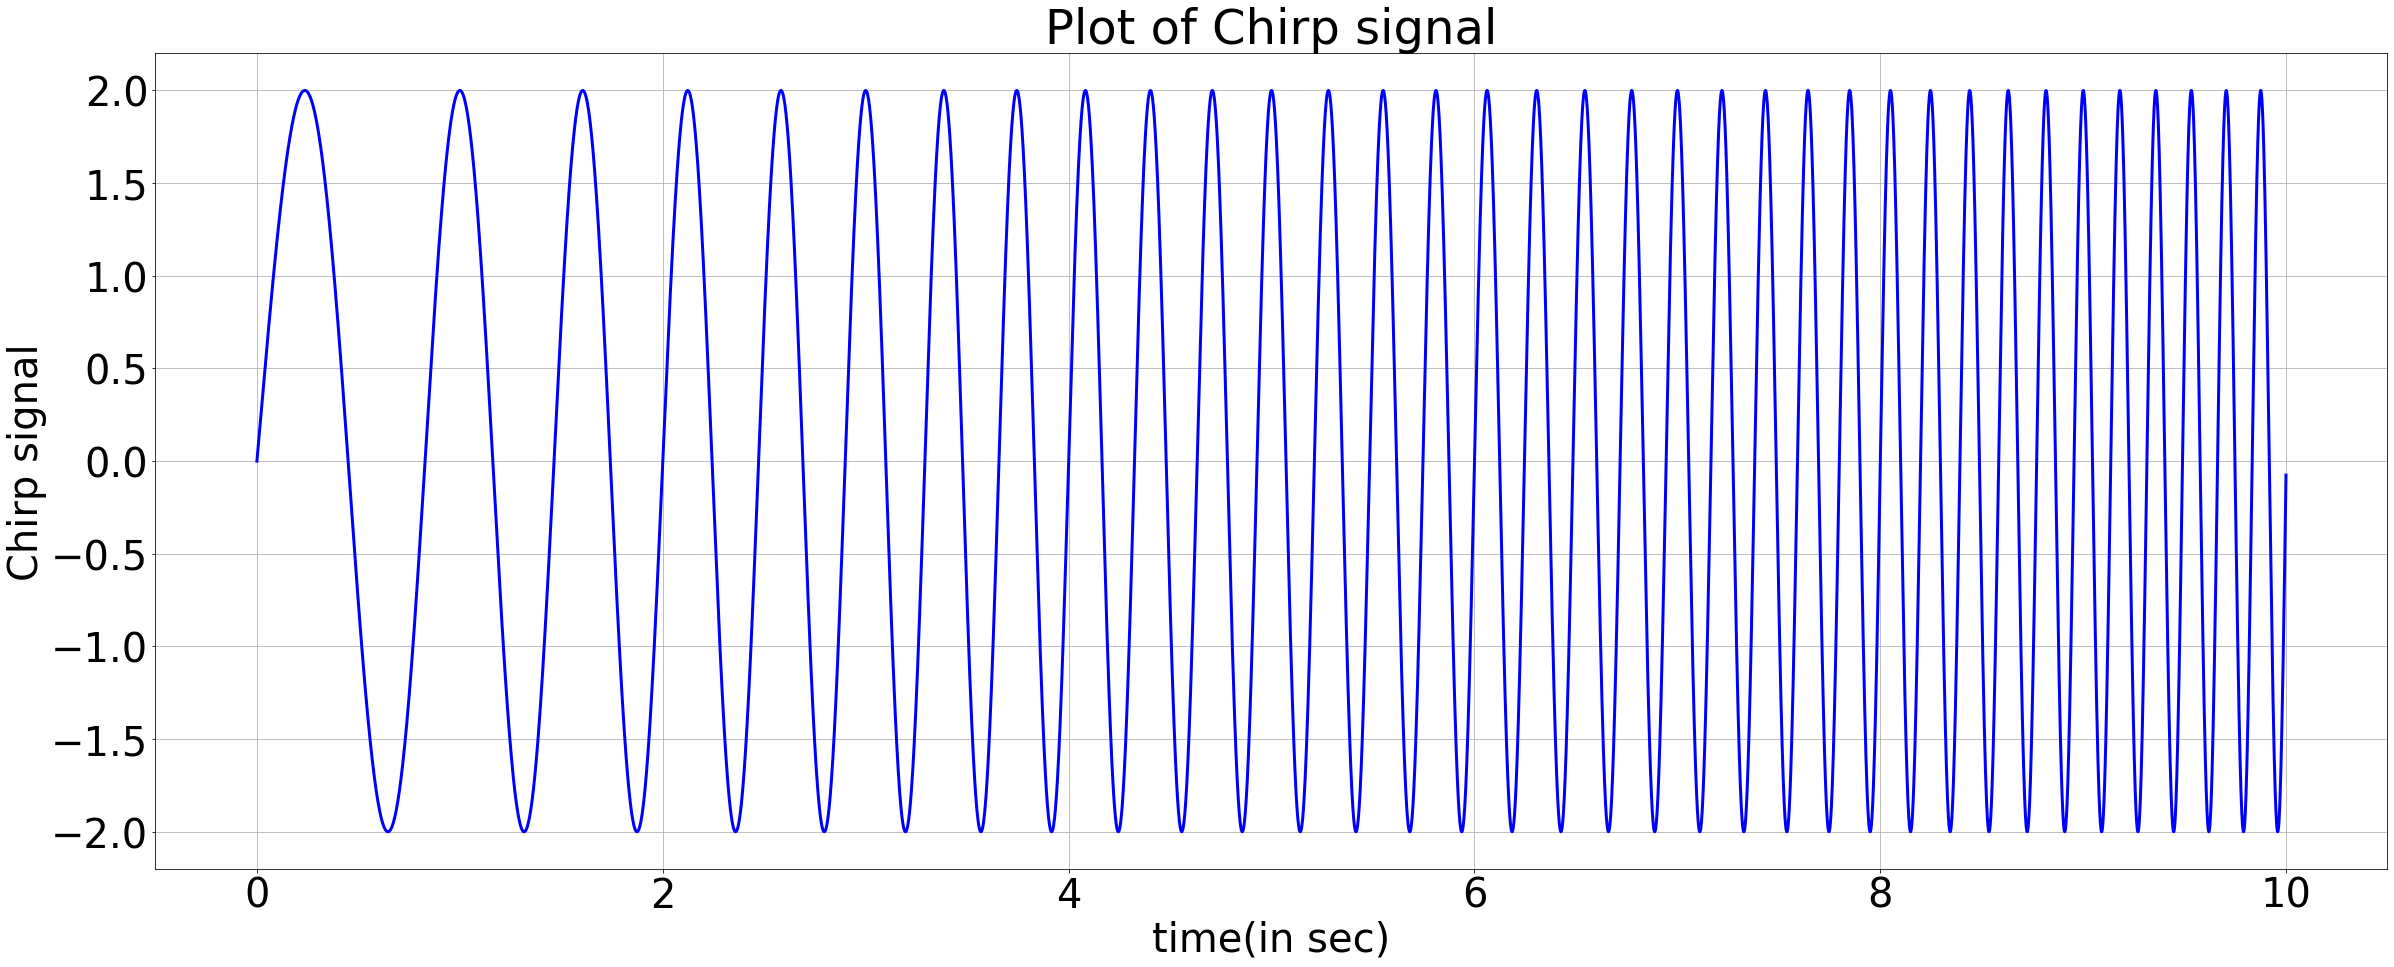

In [136]:
t = np.arange(0,10,0.001)
chirp_sig = chirp(t,1,3,4,2)

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(figsize=(40,15))
ax.plot(t,chirp_sig,color='b',lw=3)
ax.set_xlabel('time(in sec)')
ax.set_ylabel('Chirp signal')
ax.set_title('Plot of Chirp signal')
ax.grid()

Decomposition and plotting of signal into wavelet coefficients

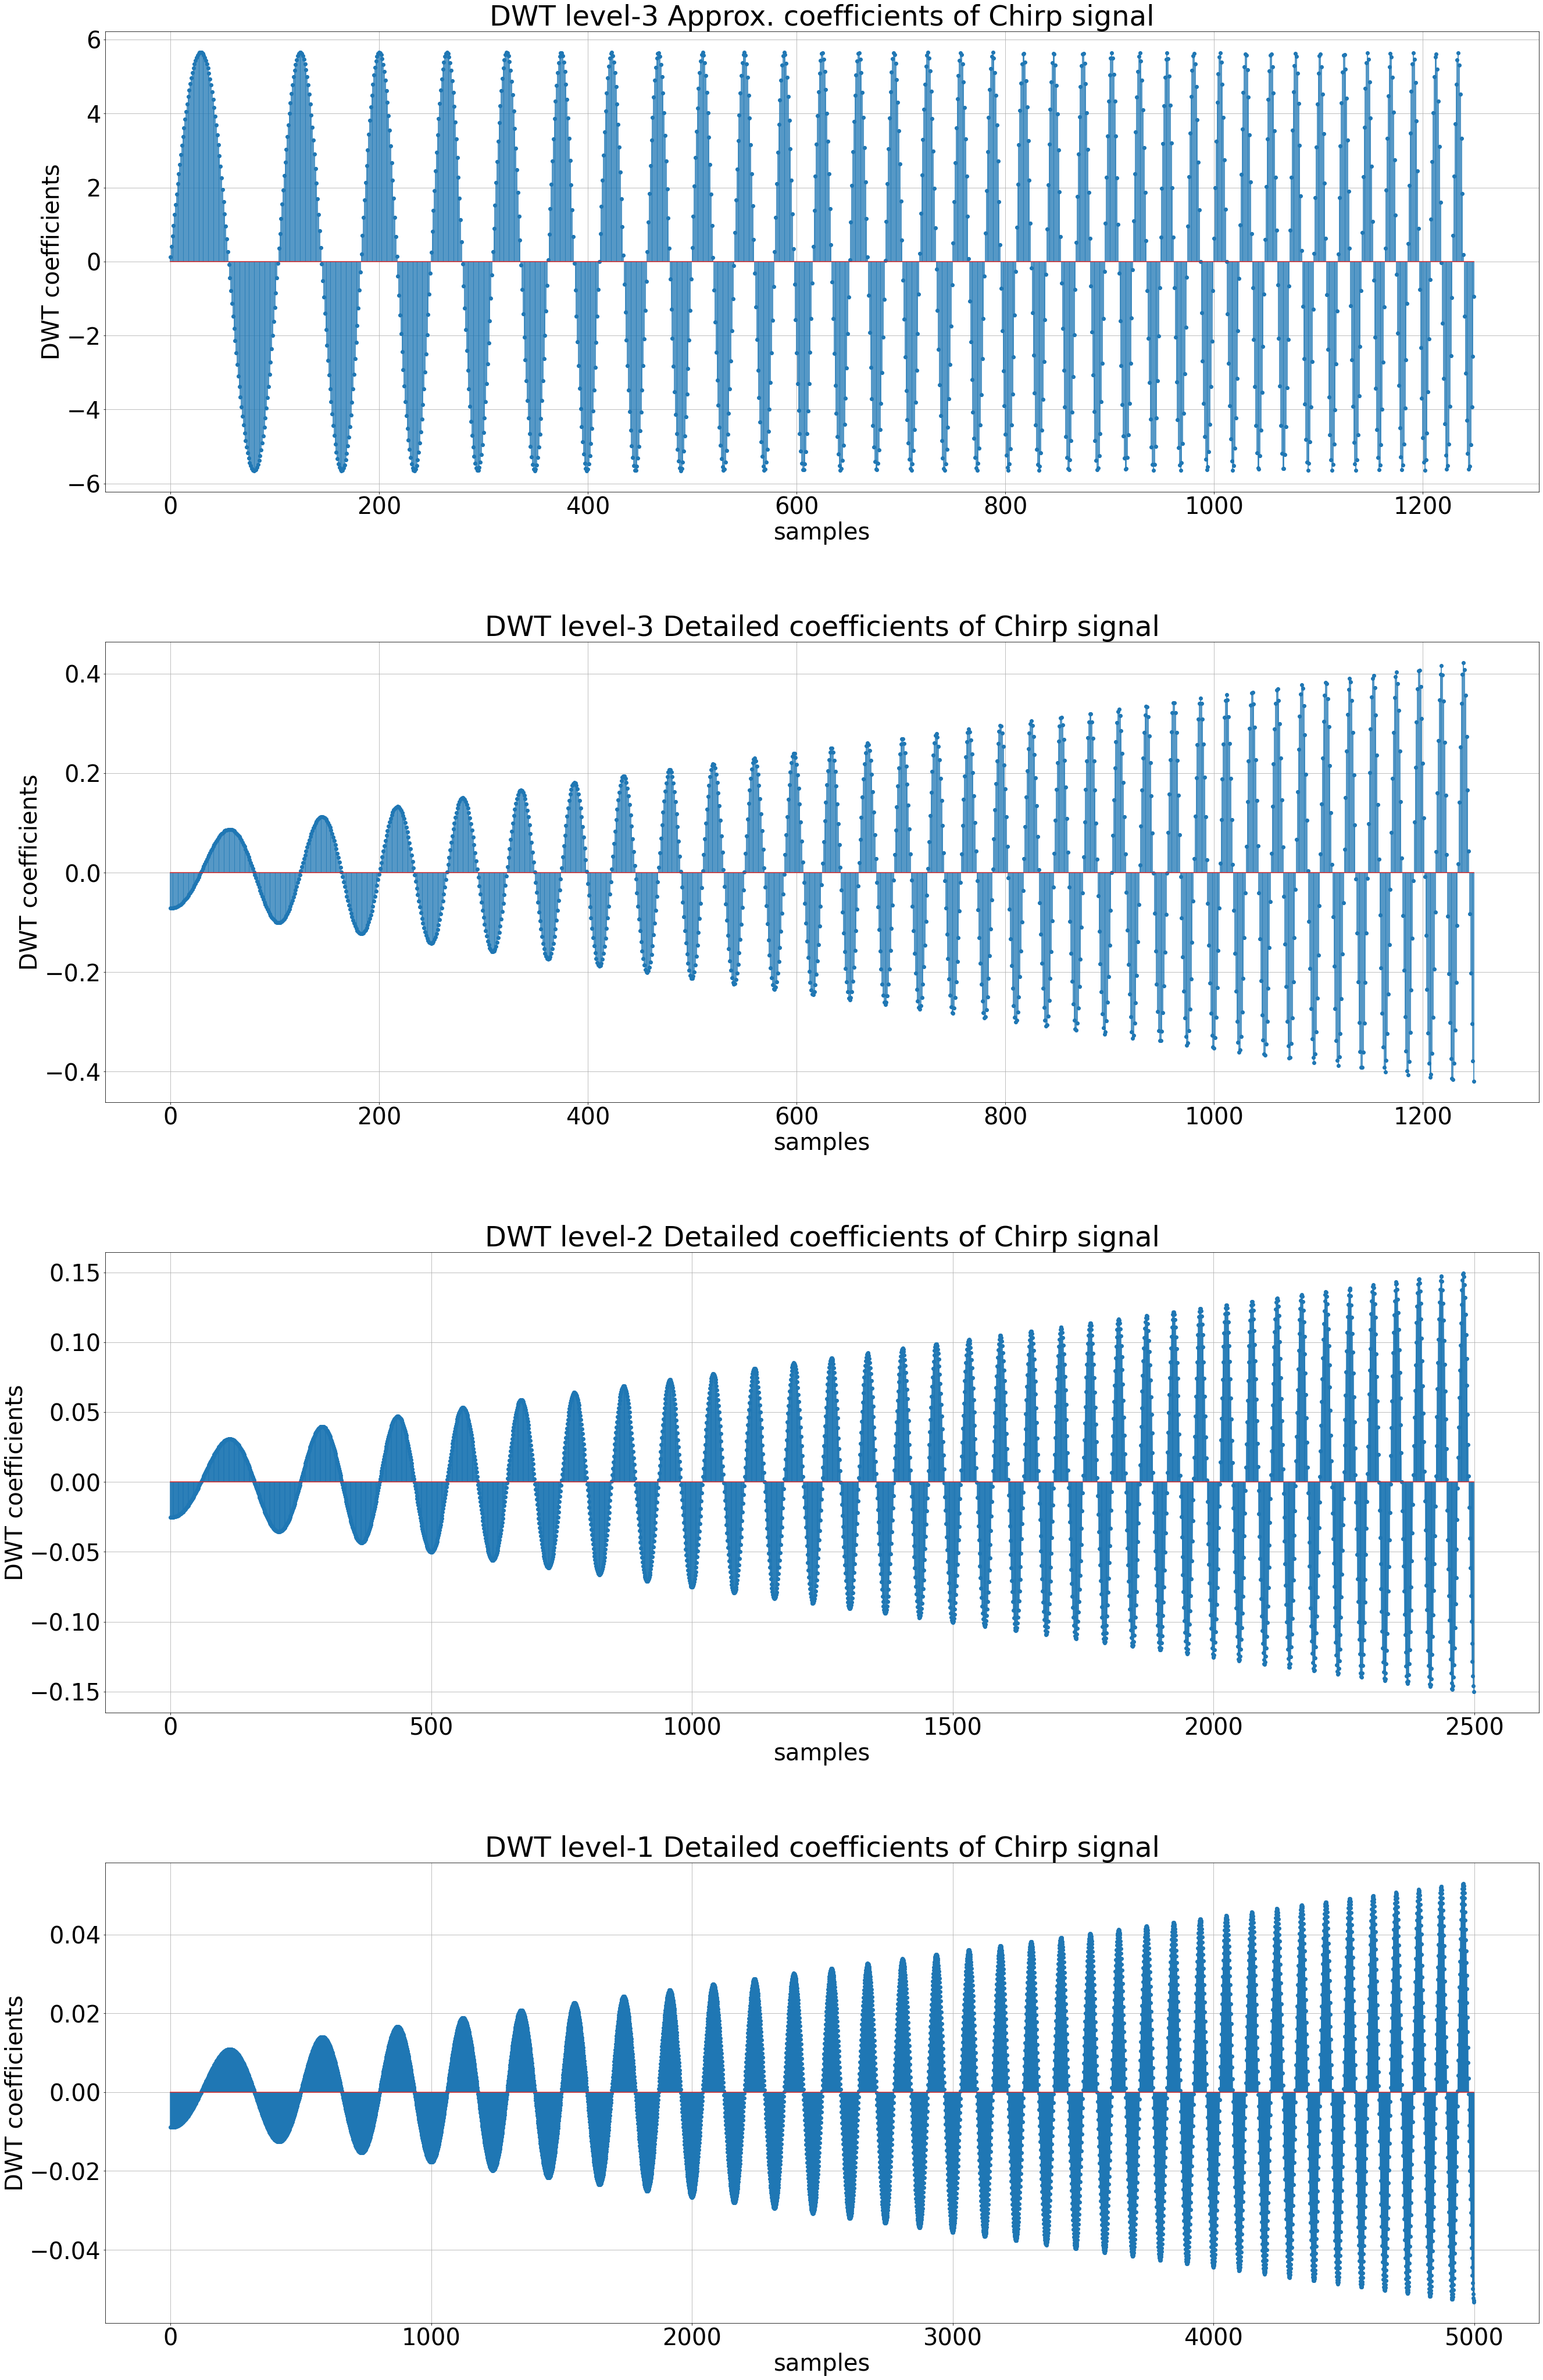

In [137]:
L = 3
coeffs = pywt.wavedec(chirp_sig, 'db1', level=L)

xvalues = []
titles = []
for i in range(L+1):
    temp_N = coeffs[i].size
    if i==0:
        temp_title = f'DWT level-{L-i} Approx. coefficients of Chirp signal'
    else:
        temp_title = f'DWT level-{L-i+1} Detailed coefficients of Chirp signal'
    xvalues.append(np.arange(temp_N))
    titles.append(temp_title)
    
matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(L+1,figsize=(40,60))

for i in range(L+1):
    ax[i].stem(xvalues[i],coeffs[i],use_line_collection=True)
    ax[i].set_xlabel('samples')
    ax[i].set_ylabel('DWT coefficients')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)

Reconstruction and plotting of signal components of different levels

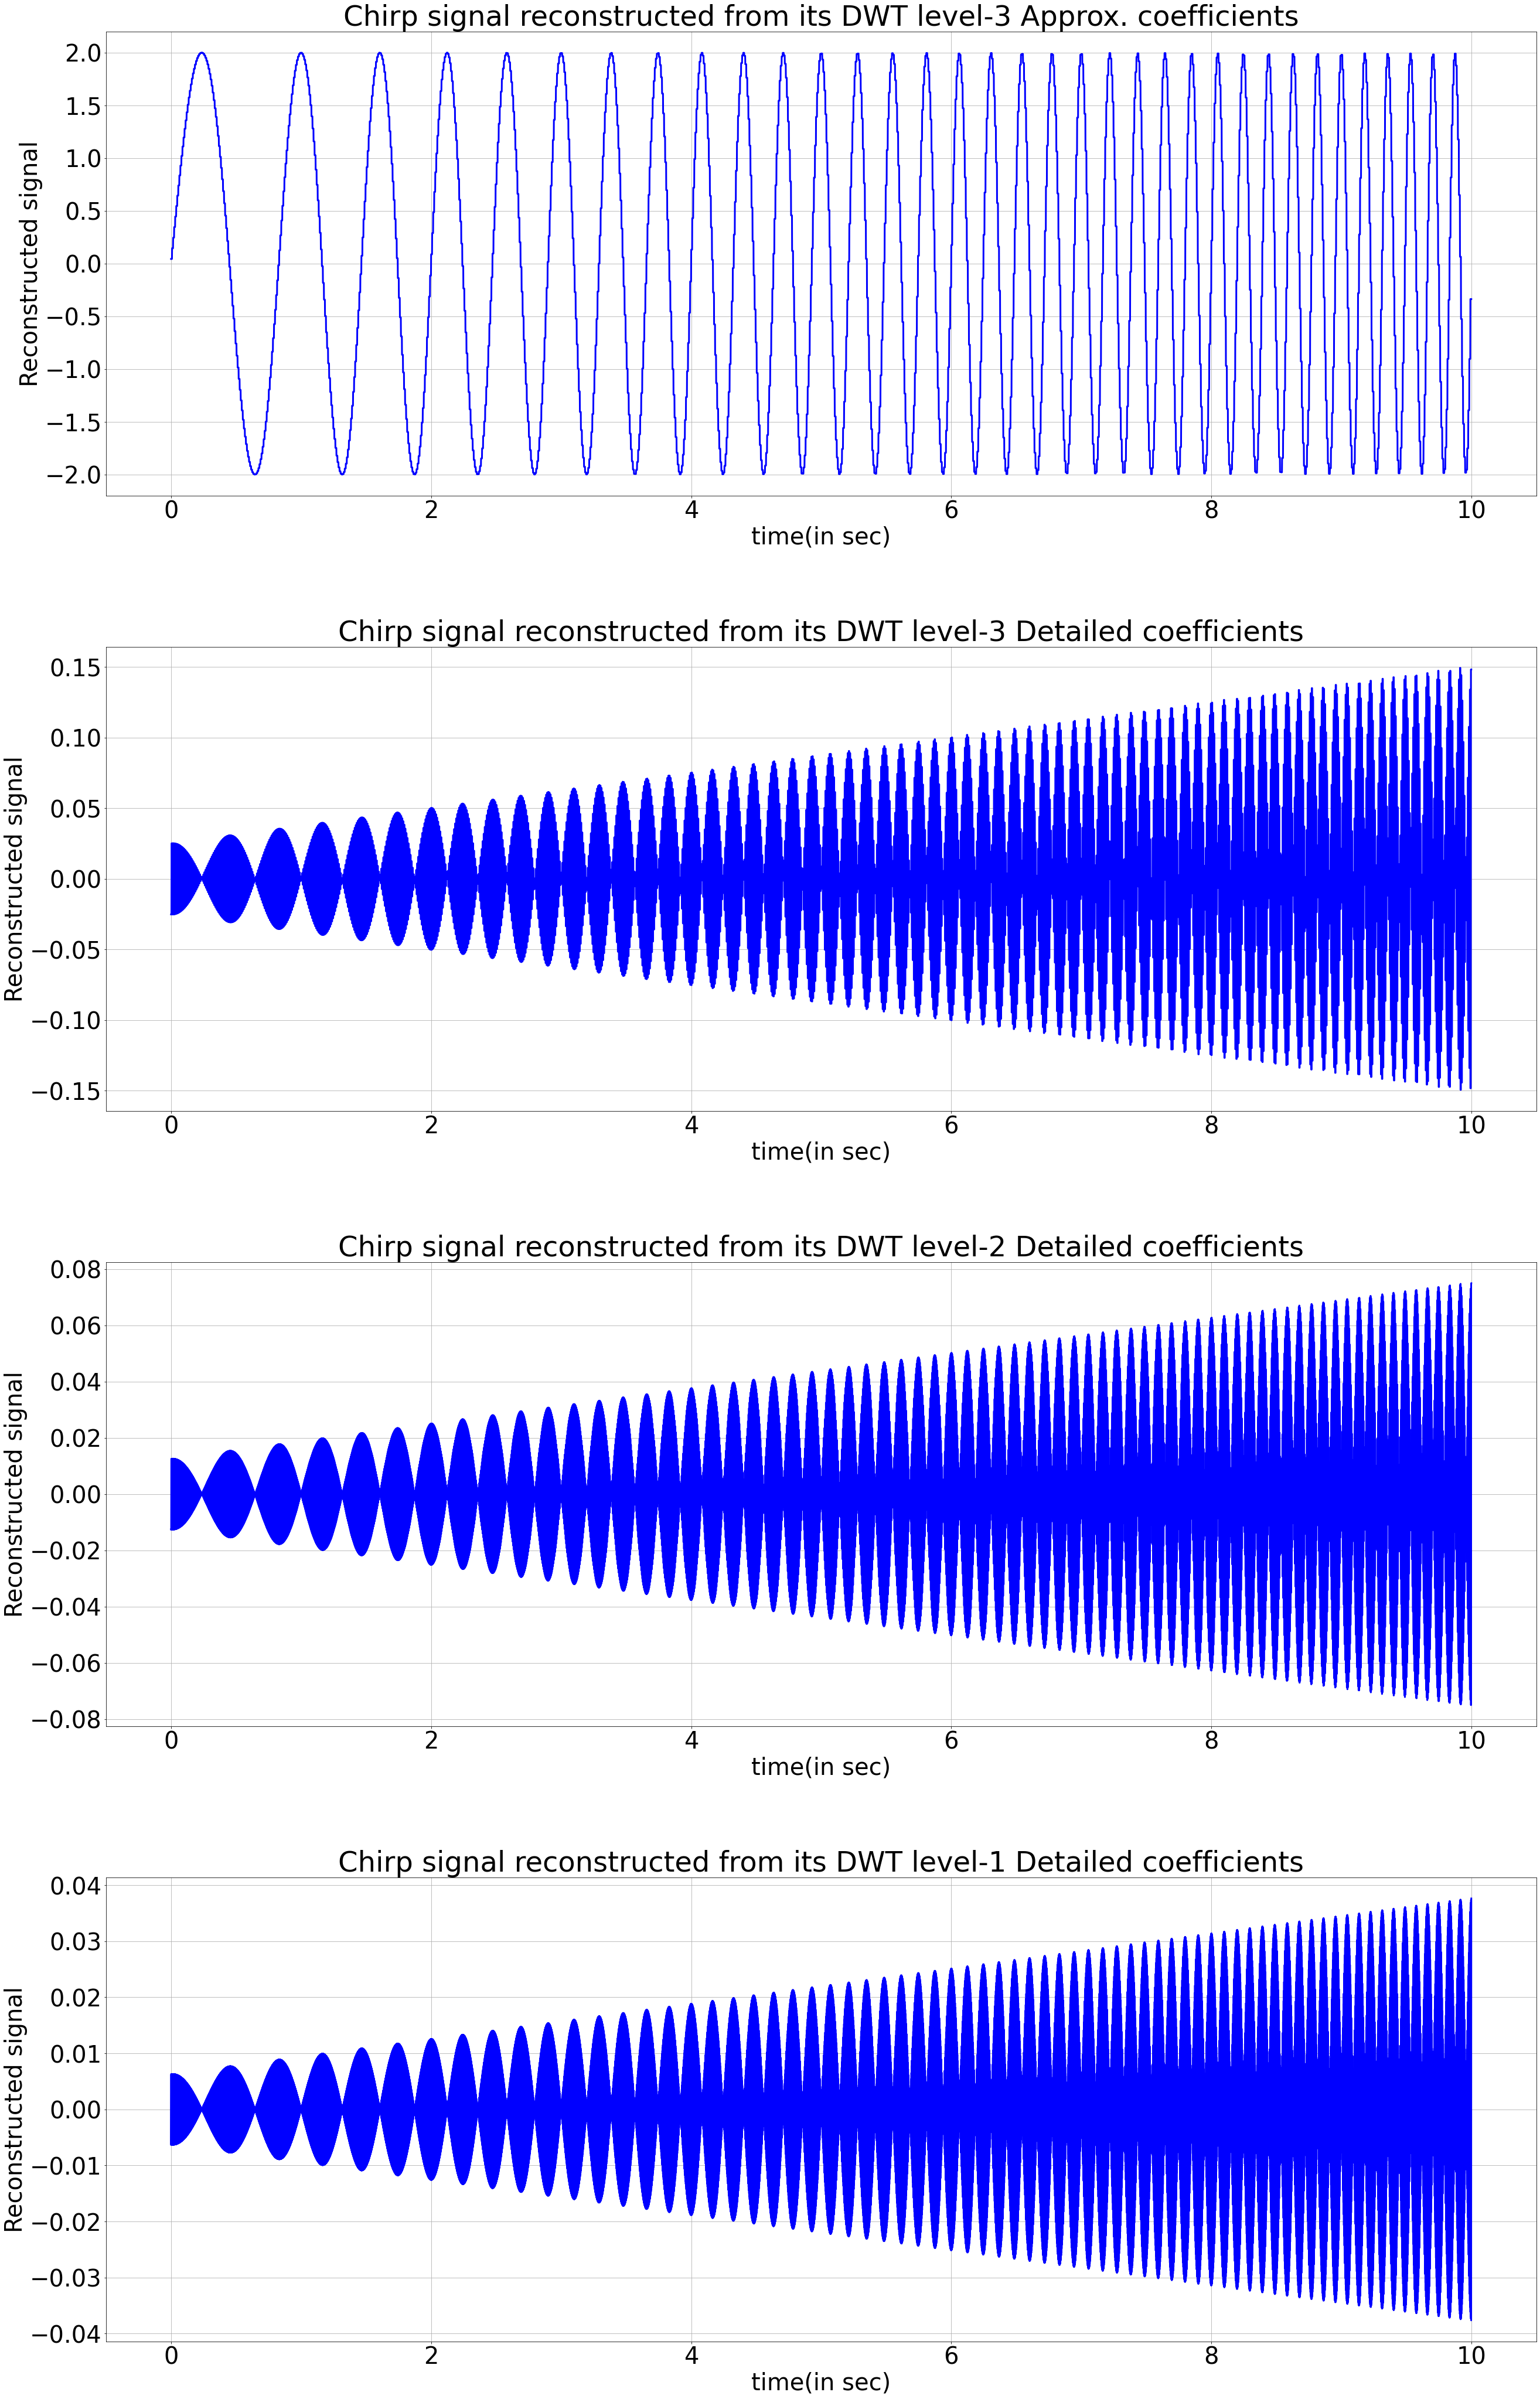

In [138]:
chirp_sig_rec = []
for i in range(L+1):
    temp_coeffs = []
    for j in range(L+1):
        if j!=i:
            temp = np.zeros(len(coeffs[j]))
        else:
            temp = coeffs[i]
        temp_coeffs.append(temp)
    temp_rec = pywt.waverec(temp_coeffs,'db1')
    chirp_sig_rec.append(temp_rec)

titles = []
for i in range(L+1):
    temp_N = coeffs[i].size
    if i==0:
        temp_title = f'Chirp signal reconstructed from its DWT level-{L-i} Approx. coefficients'
    else:
        temp_title = f'Chirp signal reconstructed from its DWT level-{L-i+1} Detailed coefficients'
    titles.append(temp_title)

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(L+1,figsize=(40,60))
for i in range(L+1):
    ax[i].plot(t,chirp_sig_rec[i],color='b',lw=3)
    ax[i].set_xlabel('time(in sec)')
    ax[i].set_ylabel('Reconstructed signal')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)
    

# 2. Consider the sample HeaviSine signal in PyWavelets library. The signal is added with AWGN and a noisy signal is generated with SNR of 15 dB.

Generation of noise and noisy signal from given signal

In [139]:
t = np.arange(0,10000)
N = len(t)  #No. of time samples
SNR = 15  #in dB
sig = pywt.data.demo_signal(name='HeaviSine',n=N)
sig_power = np.mean(np.square(sig))

# SNR = 10log10(sig_power/noise_power)
# sig_power/noise_power = 10^(SNR/10)
# noise_power = noise_var = sig_power/(10^(SNR/10))

noise_var = sig_power/(10**(SNR/10))
noise = np.random.normal(loc=0,scale=np.sqrt(noise_var),size=N)

noisy_sig = sig + noise

Plotting of original and noisy signals

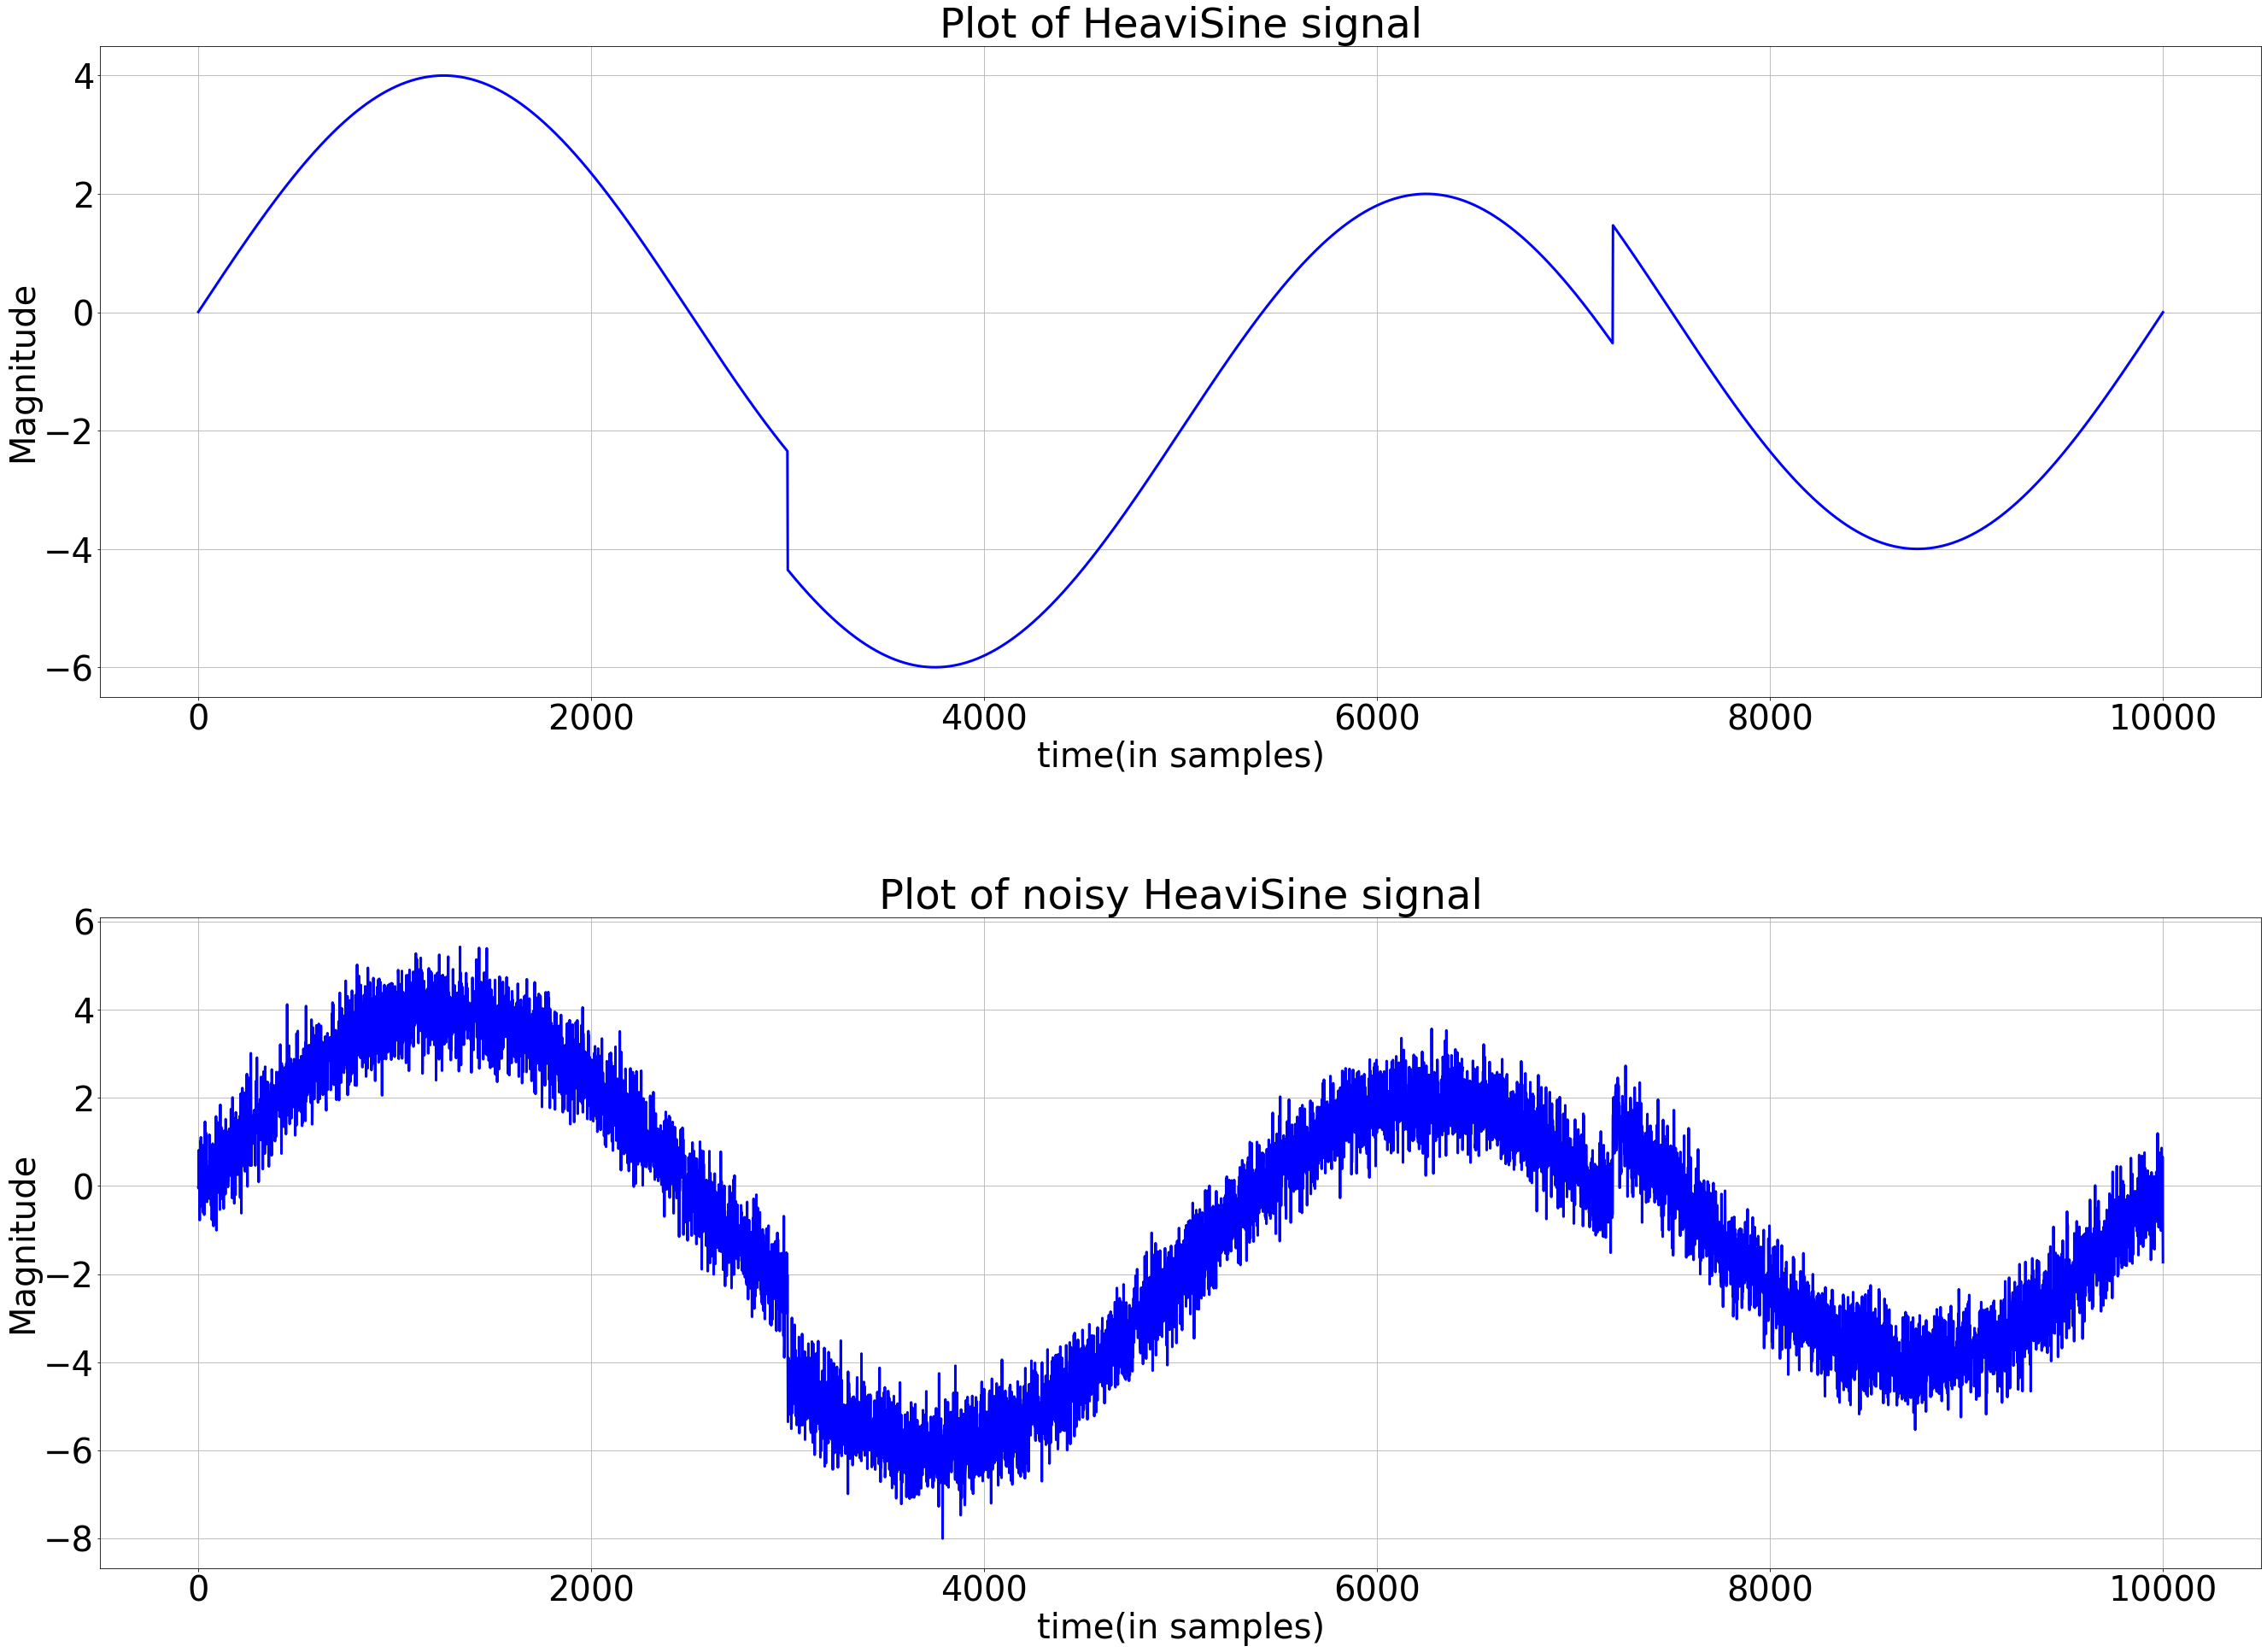

In [140]:
yalues = [sig,noisy_sig]
titles = ['Plot of HeaviSine signal','Plot of noisy HeaviSine signal']



matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,1,figsize=(40,30))

for i in range(len(titles)):
    ax[i].plot(t,yalues[i],color='b',lw=3)
    ax[i].set_xlabel('time(in samples)')
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)

## (a) Perform Wavelet decomposition on this signal. 

Decomposition of signal and plotting the wavelet coefficients of given signal

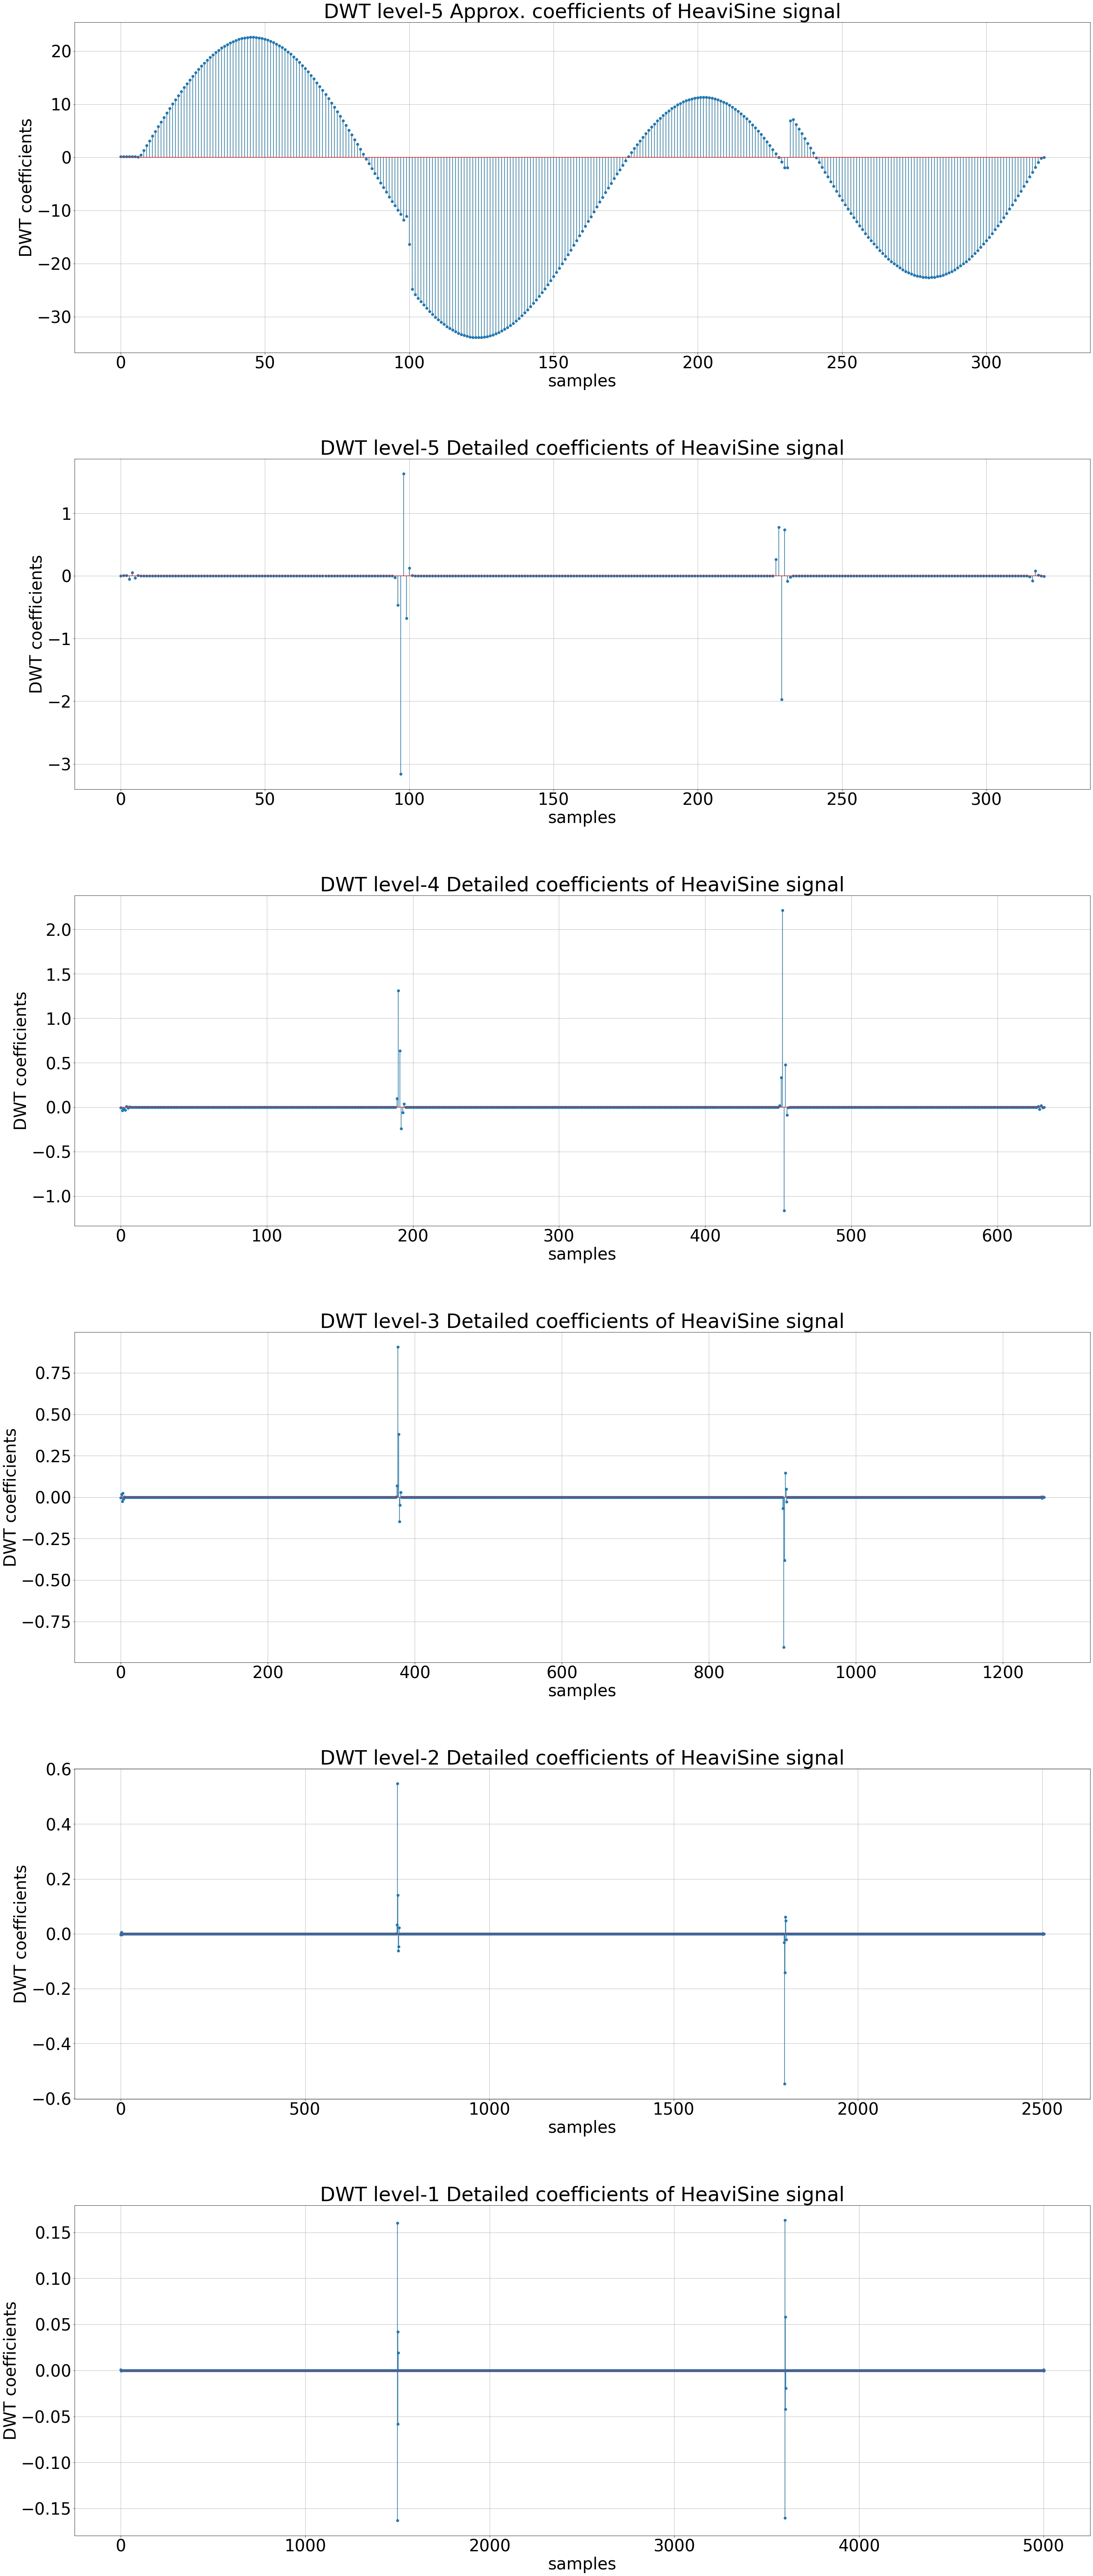

In [141]:
L = 5
coeffs = pywt.wavedec(sig, 'db5', level=L)

xvalues = []
titles = []
for i in range(L+1):
    temp_N = coeffs[i].size
    if i==0:
        temp_title = f'DWT level-{L-i} Approx. coefficients of HeaviSine signal'
    else:
        temp_title = f'DWT level-{L-i+1} Detailed coefficients of HeaviSine signal'
    xvalues.append(np.arange(temp_N))
    titles.append(temp_title)


matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(len(coeffs),figsize=(40,90))
for i in range(L+1):
    ax[i].stem(xvalues[i],coeffs[i],use_line_collection=True)
    ax[i].set_xlabel('samples')
    ax[i].set_ylabel('DWT coefficients')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)


Decomposition and plotting the wavelet coefficients of noisy signal

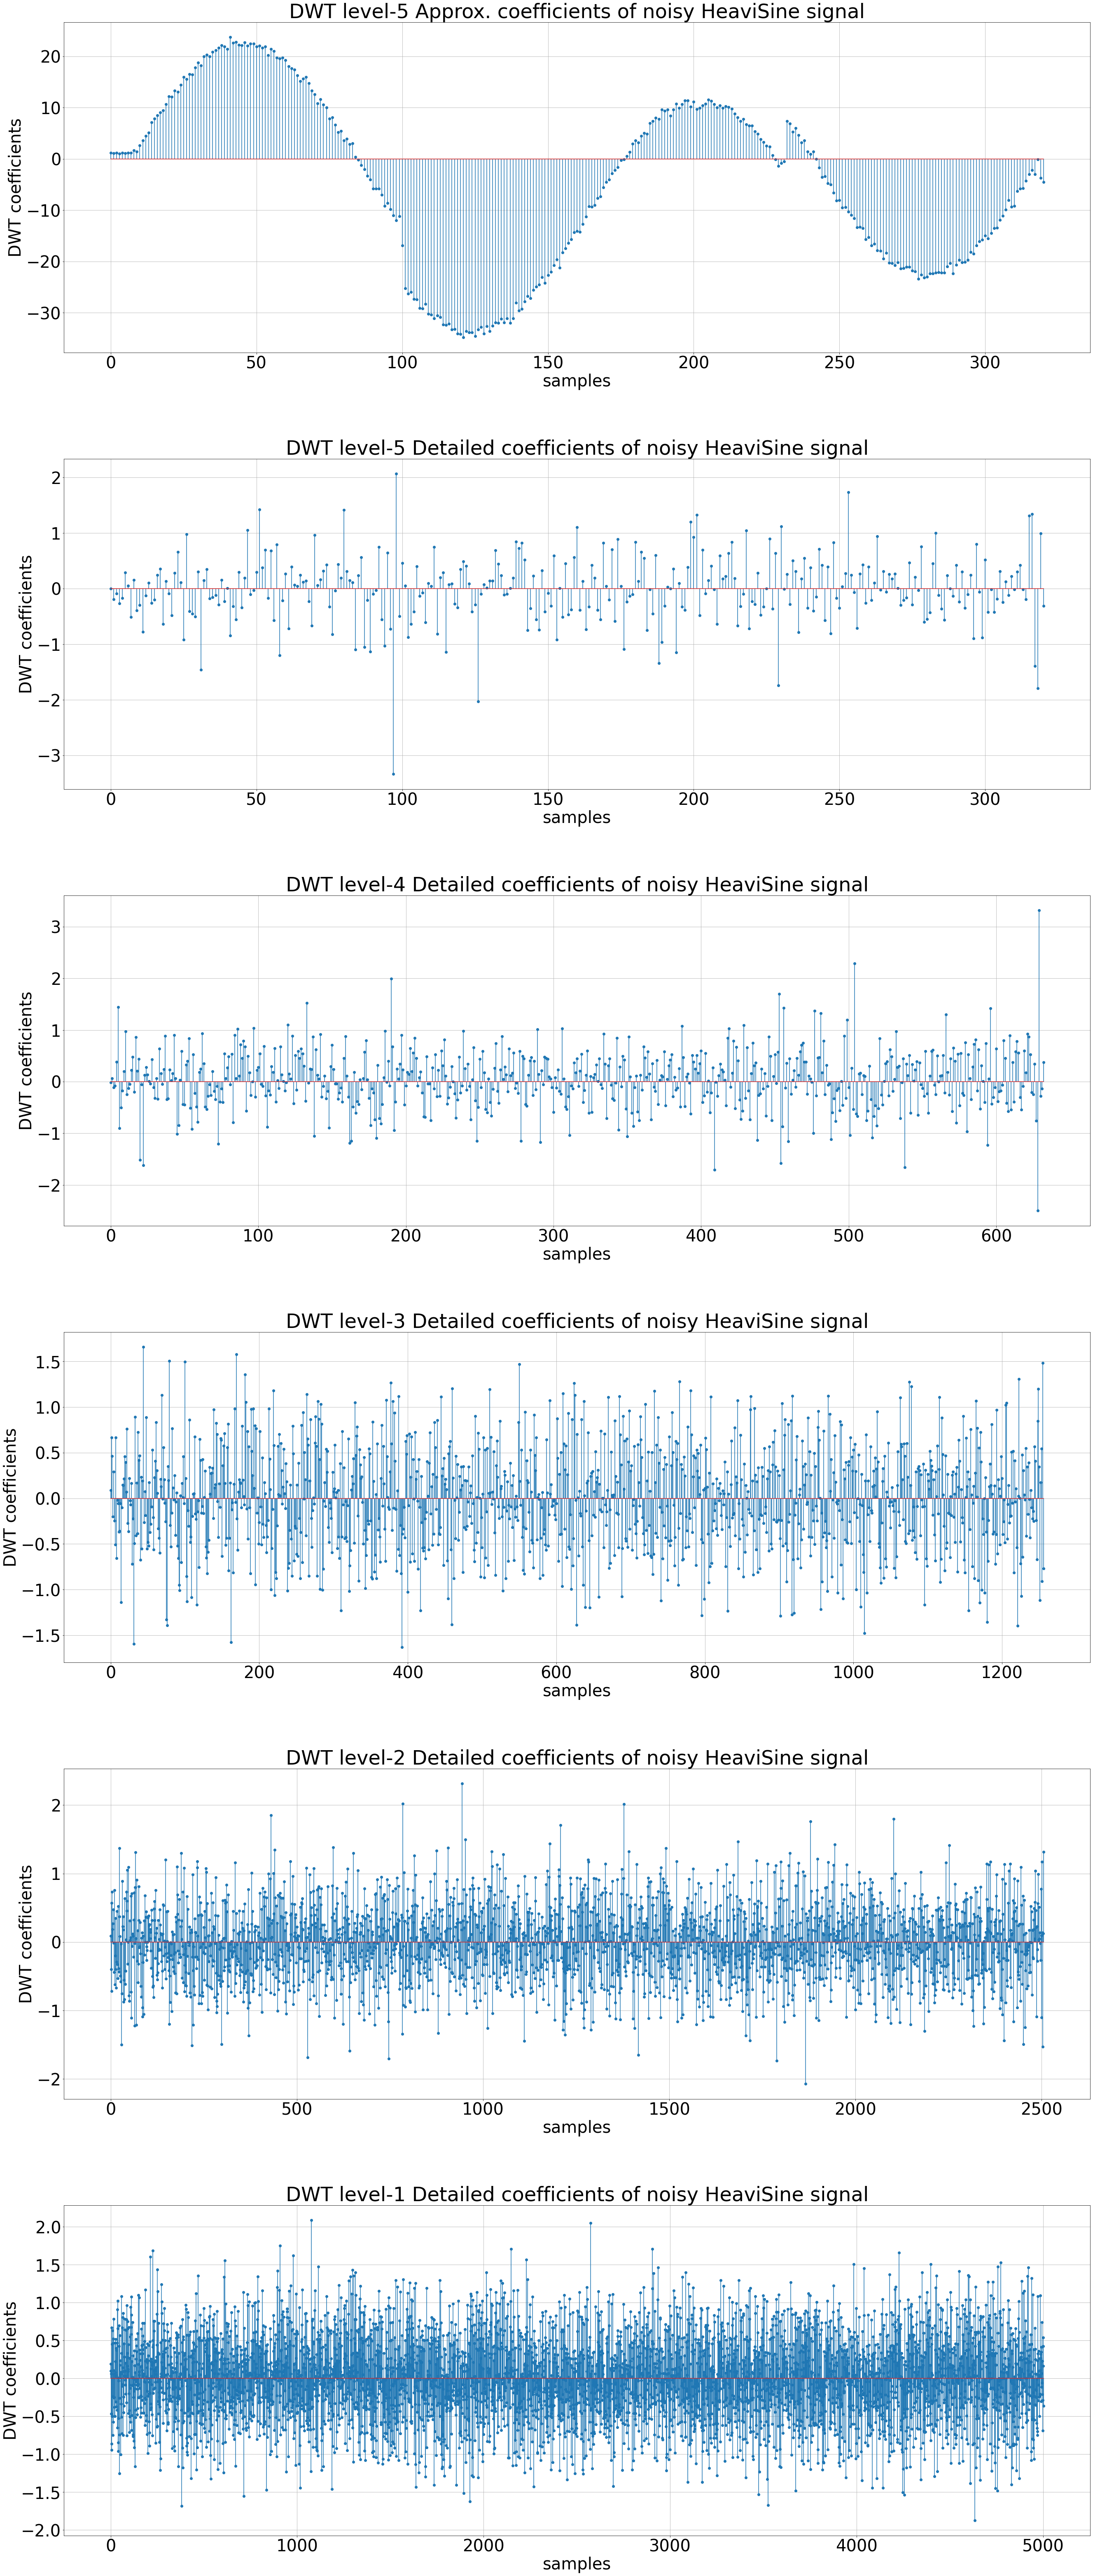

In [142]:
L = 5
coeffs = pywt.wavedec(noisy_sig, 'db5', level=L)

xvalues = []
titles = []
for i in range(L+1):
    temp_N = coeffs[i].size
    if i==0:
        temp_title = f'DWT level-{L-i} Approx. coefficients of noisy HeaviSine signal'
    else:
        temp_title = f'DWT level-{L-i+1} Detailed coefficients of noisy HeaviSine signal'
    xvalues.append(np.arange(temp_N))
    titles.append(temp_title)
    
    
matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(L+1,figsize=(40,90))
for i in range(L+1):
    ax[i].stem(xvalues[i],coeffs[i],use_line_collection=True)
    ax[i].set_xlabel('samples')
    ax[i].set_ylabel('DWT coefficients')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)

## (b) Use an appropriate thresholding method to denoise the signal. 

Function definitions of Hard thresholding, soft thresholding, garrote thresholding and Proposed thresholding methods

In [143]:
def hard_th(W,var,N):
    th = np.sqrt(var*2*np.log(N))
    W_th = []
    for i in range(len(W)):
        temp_W = W[i]
        temp_W_abs = np.abs(temp_W)
        temp_coeff = np.zeros(temp_W.size)
        temp_coeff[temp_W_abs>=th] = temp_W[temp_W_abs>=th]
        W_th.append(temp_coeff)
    return W_th
        

In [144]:
def soft_th(W,var,N):
    th = np.sqrt(var*2*np.log(N))
    W_th = []
    for i in range(len(W)):
        temp_W = W[i]
        temp_W_abs = np.abs(temp_W)
        temp_coeff = np.zeros(temp_W.size)
        temp_coeff[temp_W_abs>=th] = np.sign(temp_W[temp_W_abs>=th])*(temp_W_abs[temp_W_abs>=th]-th)
        W_th.append(temp_coeff)
    return W_th

In [145]:
def garrote_th(W,var,N):
    th = np.sqrt(var*2*np.log(N))
    W_th = []
    for i in range(len(W)):
        temp = pywt.threshold(W[i],th,'garrote')
        W_th.append(temp)
    return W_th

In [146]:
def prop_th(W,var,N,alpha,m):
    lvl_dict = {}
    for i in range(len(W)):
        if i==0 or i==1:
            lvl_dict[i] = len(W)-1
        else:
            lvl_dict[i] = len(W)-i
    W_th = []
    for i in range(len(W)):
        temp_th = np.sqrt(var*2*np.log(N))/np.log(lvl_dict[i]+1)
        temp_W = W[i]
        temp_W_abs = np.abs(temp_W)
        temp_coeff = np.zeros(temp_W.size)
        temp_num = (alpha+1)*(temp_th**(m+1))
        temp_den = (alpha*np.power(temp_W_abs[temp_W_abs>=temp_th],m))+(temp_th**m)
        temp_coeff[temp_W_abs>=temp_th] = np.sign(temp_W[temp_W_abs>=temp_th])*((temp_W_abs[temp_W_abs>=temp_th])-(temp_num/temp_den))
        W_th.append(temp_coeff)
    return W_th 

Function definitions of SNR and RMSE

In [147]:
def SNR(orig_s,recon_s):
    noise_power = np.sum(np.square(orig_s-recon_s))
    sig_power = np.sum(np.square(orig_s))
    snr = np.round(10*np.log10(sig_power/noise_power),2)
    return snr   

In [148]:
def RMSE(orig_s,recon_s):
    rmse = np.mean(np.square(orig_s-recon_s))
    rmse = np.round(np.sqrt(rmse),2)
    return rmse

## (c) Reconstruct the signal and compare it with the original signal. 

Thresholding the noisy wavelet coefficients using different thresholding methods and reconstructing the signal from thresholded coefficients

In [149]:
th_funs = [hard_th,soft_th,garrote_th,prop_th,prop_th]
sig_recon = []
for i in range(len(th_funs)):
    if i==3:
        coeff_th = th_funs[i](coeffs,noise_var,N,0.75,3)
    elif i==4:
        coeff_th = th_funs[i](coeffs,noise_var,N,0.5,3)
    else:
        coeff_th = th_funs[i](coeffs,noise_var,N)
    temp = pywt.waverec(coeff_th,'db5')
    sig_recon.append(temp)

Plotting the reconstructed signals

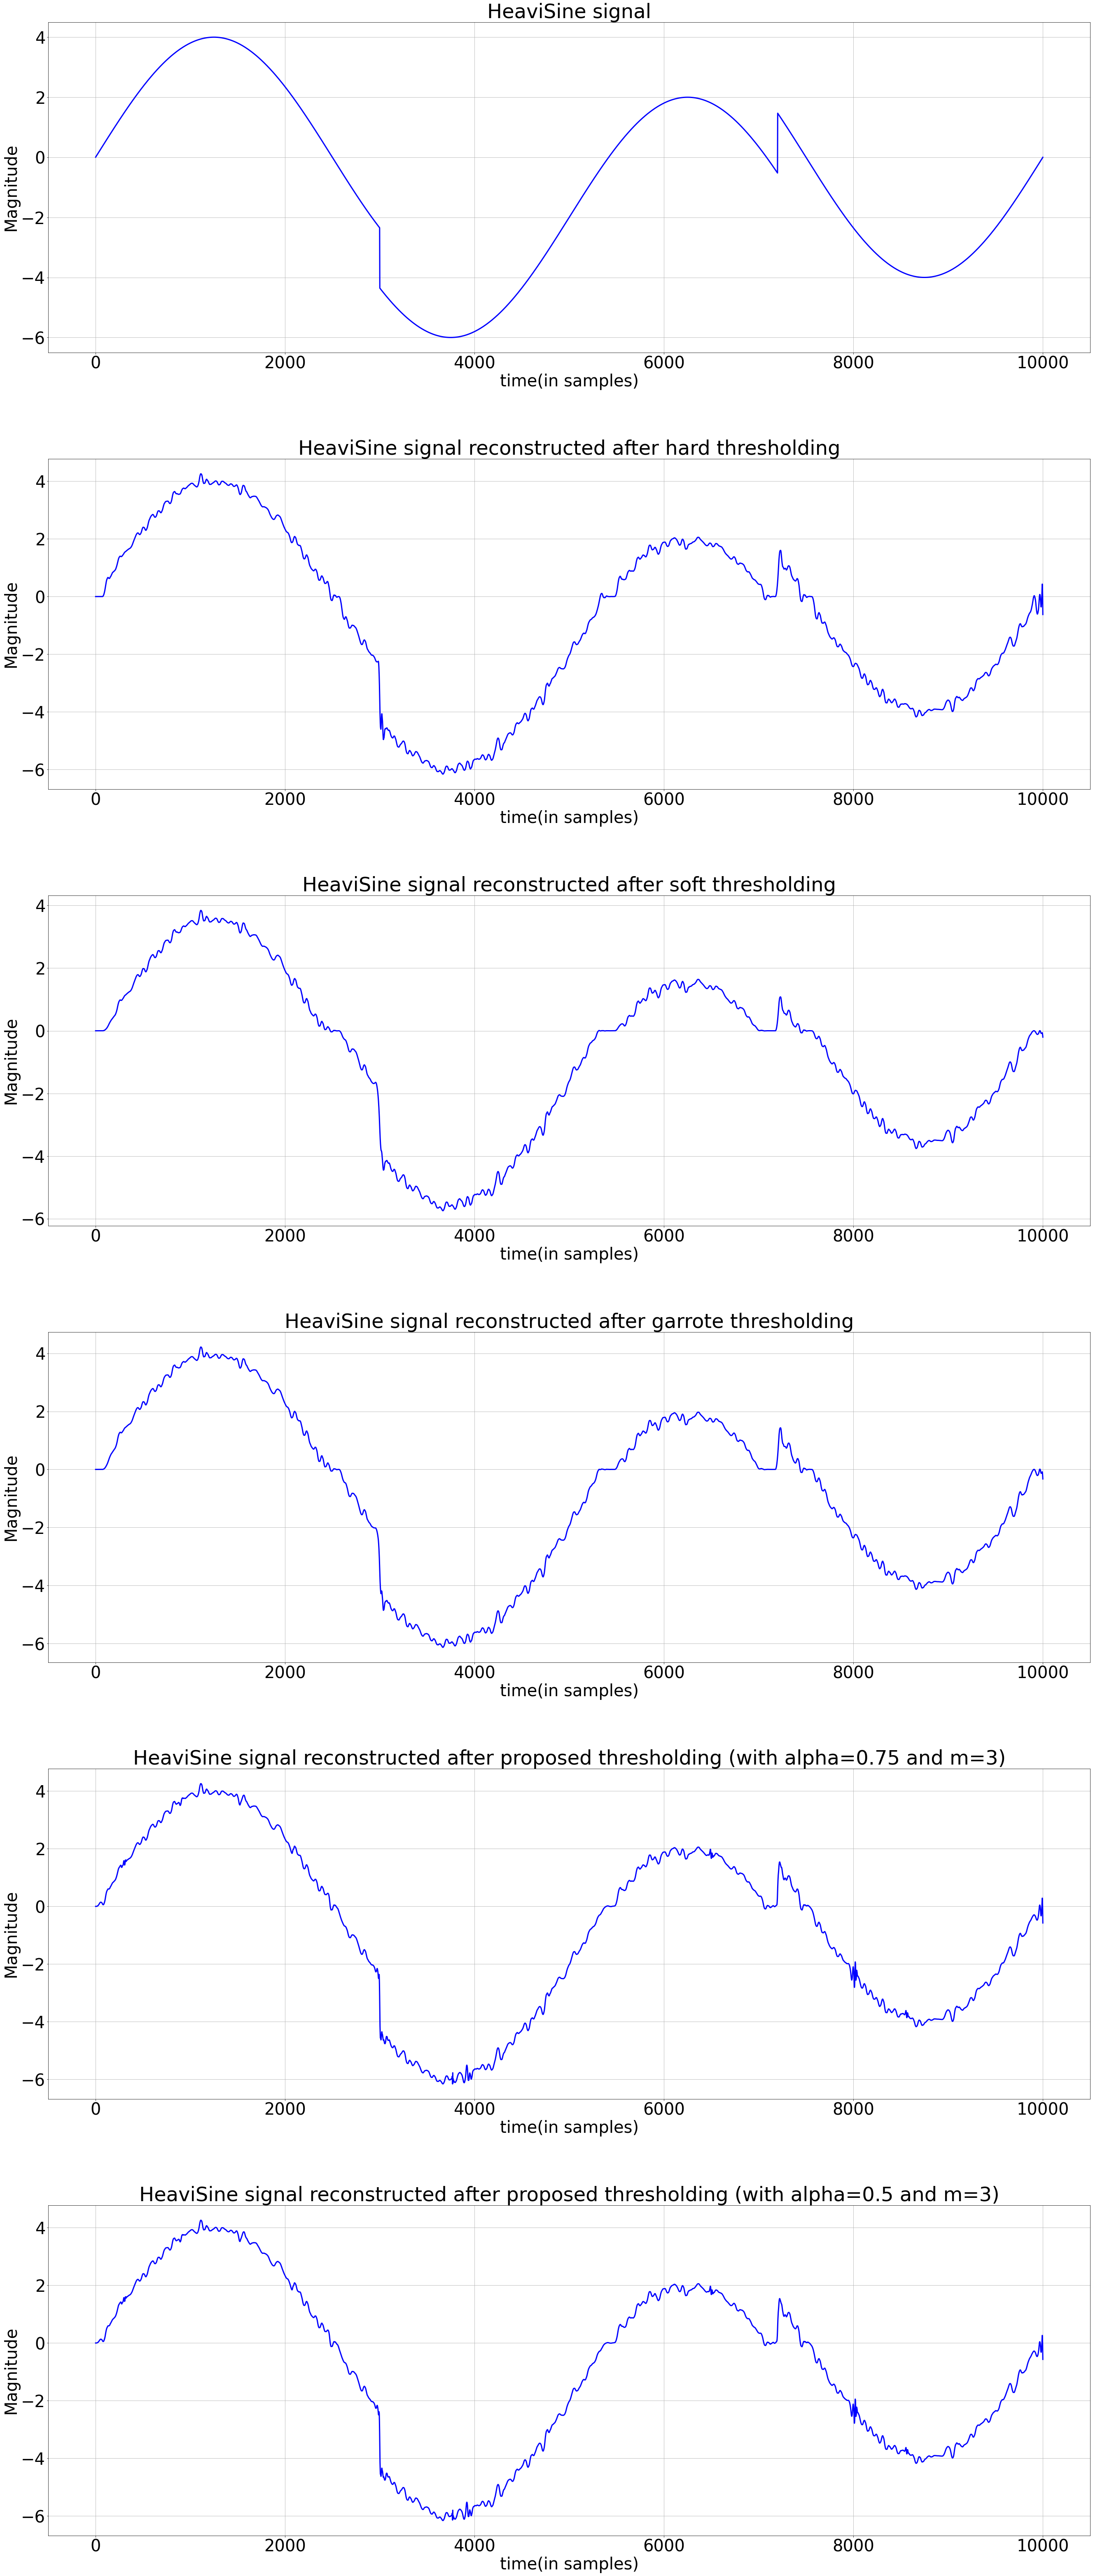

In [150]:
titles = ['HeaviSine signal','HeaviSine signal reconstructed after hard thresholding','HeaviSine signal reconstructed after soft thresholding',
          'HeaviSine signal reconstructed after garrote thresholding','HeaviSine signal reconstructed after proposed thresholding (with alpha=0.75 and m=3)',
        'HeaviSine signal reconstructed after proposed thresholding (with alpha=0.5 and m=3)']


matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(len(titles),figsize=(40,90))

for i in range(len(titles)):
    if i==0:
        ax[i].plot(t,sig,color='b',lw=3)
    else:
        ax[i].plot(t,sig_recon[i-1],color='b',lw=3)
    ax[i].set_xlabel('time(in samples)')
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)

Calculating the SNRs and RMSEs of reconstructed signals obtained using different thresholding methods

In [151]:
SNRs = []
RMSEs = []
sig_labels = ['Hard thresholding','Soft thresholding','Garrote thresholding','Proposed thresholding (alpha=0.75,m=3)','Proposed thresholding (alpha=0.5,m=3)']
for i in range(len(titles)-1):
    snr = SNR(sig,sig_recon[i])
    rmse = RMSE(sig,sig_recon[i])
    SNRs.append(snr)
    RMSEs.append(rmse)
print('The SNR and RMSE of the reconstructed signals are shown below')
dict_disp = {'Signal reconstructed (based on thresholding type)':sig_labels,
            'SNR(dB)':SNRs,'RMSE':RMSEs}
df = pd.DataFrame(dict_disp)
display(df)

The SNR and RMSE of the reconstructed signals are shown below


Signal reconstructed (based on thresholding type)  SNR(dB)  RMSE
0                                 Hard thresholding    27.44  0.13
1                                 Soft thresholding    17.28  0.42
2                              Garrote thresholding    24.97  0.17
3            Proposed thresholding (alpha=0.75,m=3)    28.20  0.12
4             Proposed thresholding (alpha=0.5,m=3)    28.17  0.12

# 3. Download the NASA's Femto Bearing Dataset from here. This is a dataset containing high frequency sensor data regarding accelerated degradation of bearings

Reading the Femto Bearing data and obtaining the noisy signal from it

In [152]:
doc_loc = r"C:\D_drive\IITG\Sem-2\DSP Lab\Assignments\Assignment-6\FEMTOBearingDataSet\Test_set\Bearing1_3\acc_00002.csv"
data = pd.read_csv(doc_loc,header=None)
data = data.to_numpy()

Plotting the noisy Femto bearing signal

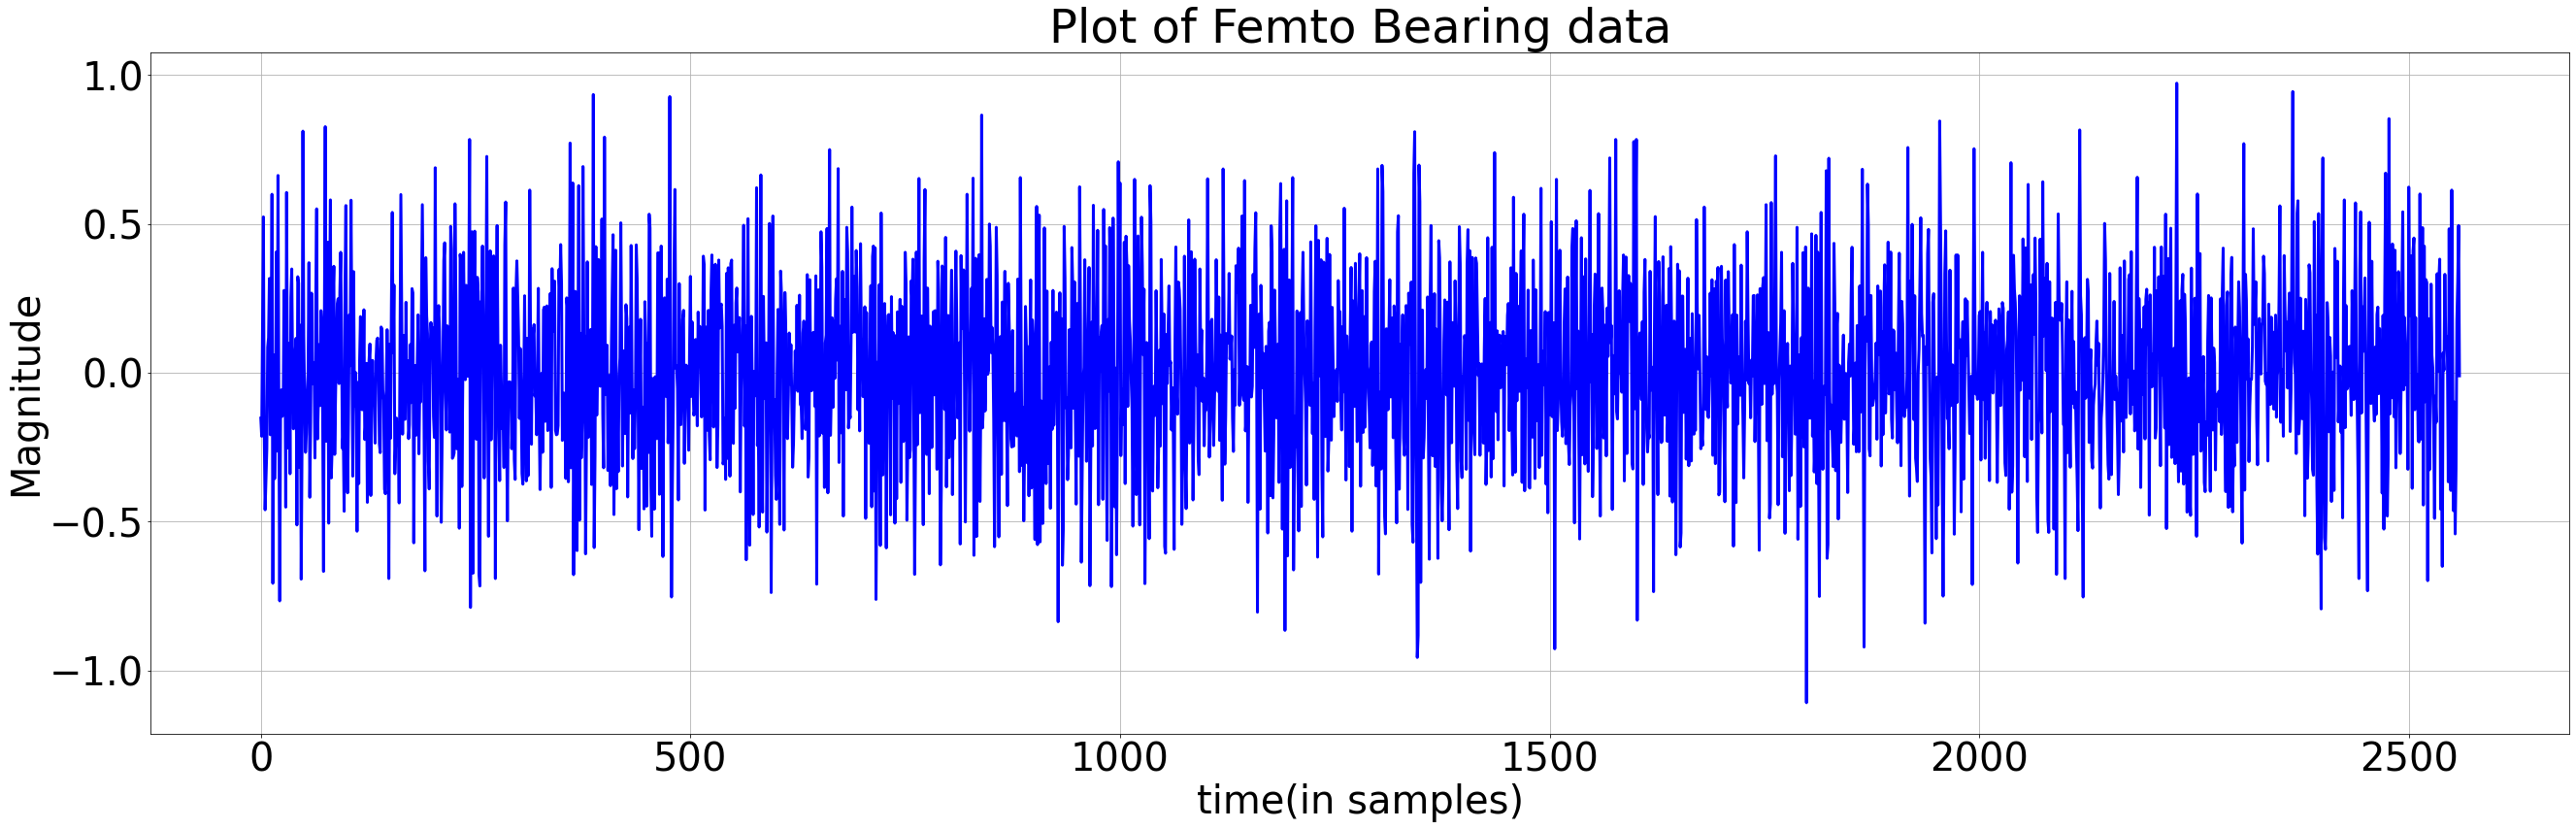

In [153]:
sig = data[:,-1]
N = sig.size
n = np.arange(N)

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(figsize=(40,15))
ax.plot(n,sig,color='b',lw=3)
ax.set_xlabel('time(in samples)')
ax.set_ylabel('Magnitude')
ax.set_title('Plot of Femto Bearing data')
ax.grid()
fig.tight_layout(pad=3.0)

## (a) Deconstruct the signal and smooth it out (remove high frequency noise) by using a suitable threshold.

Decomposing the noisy signal into different levels of wavelet coefficients and plotting the coefficients

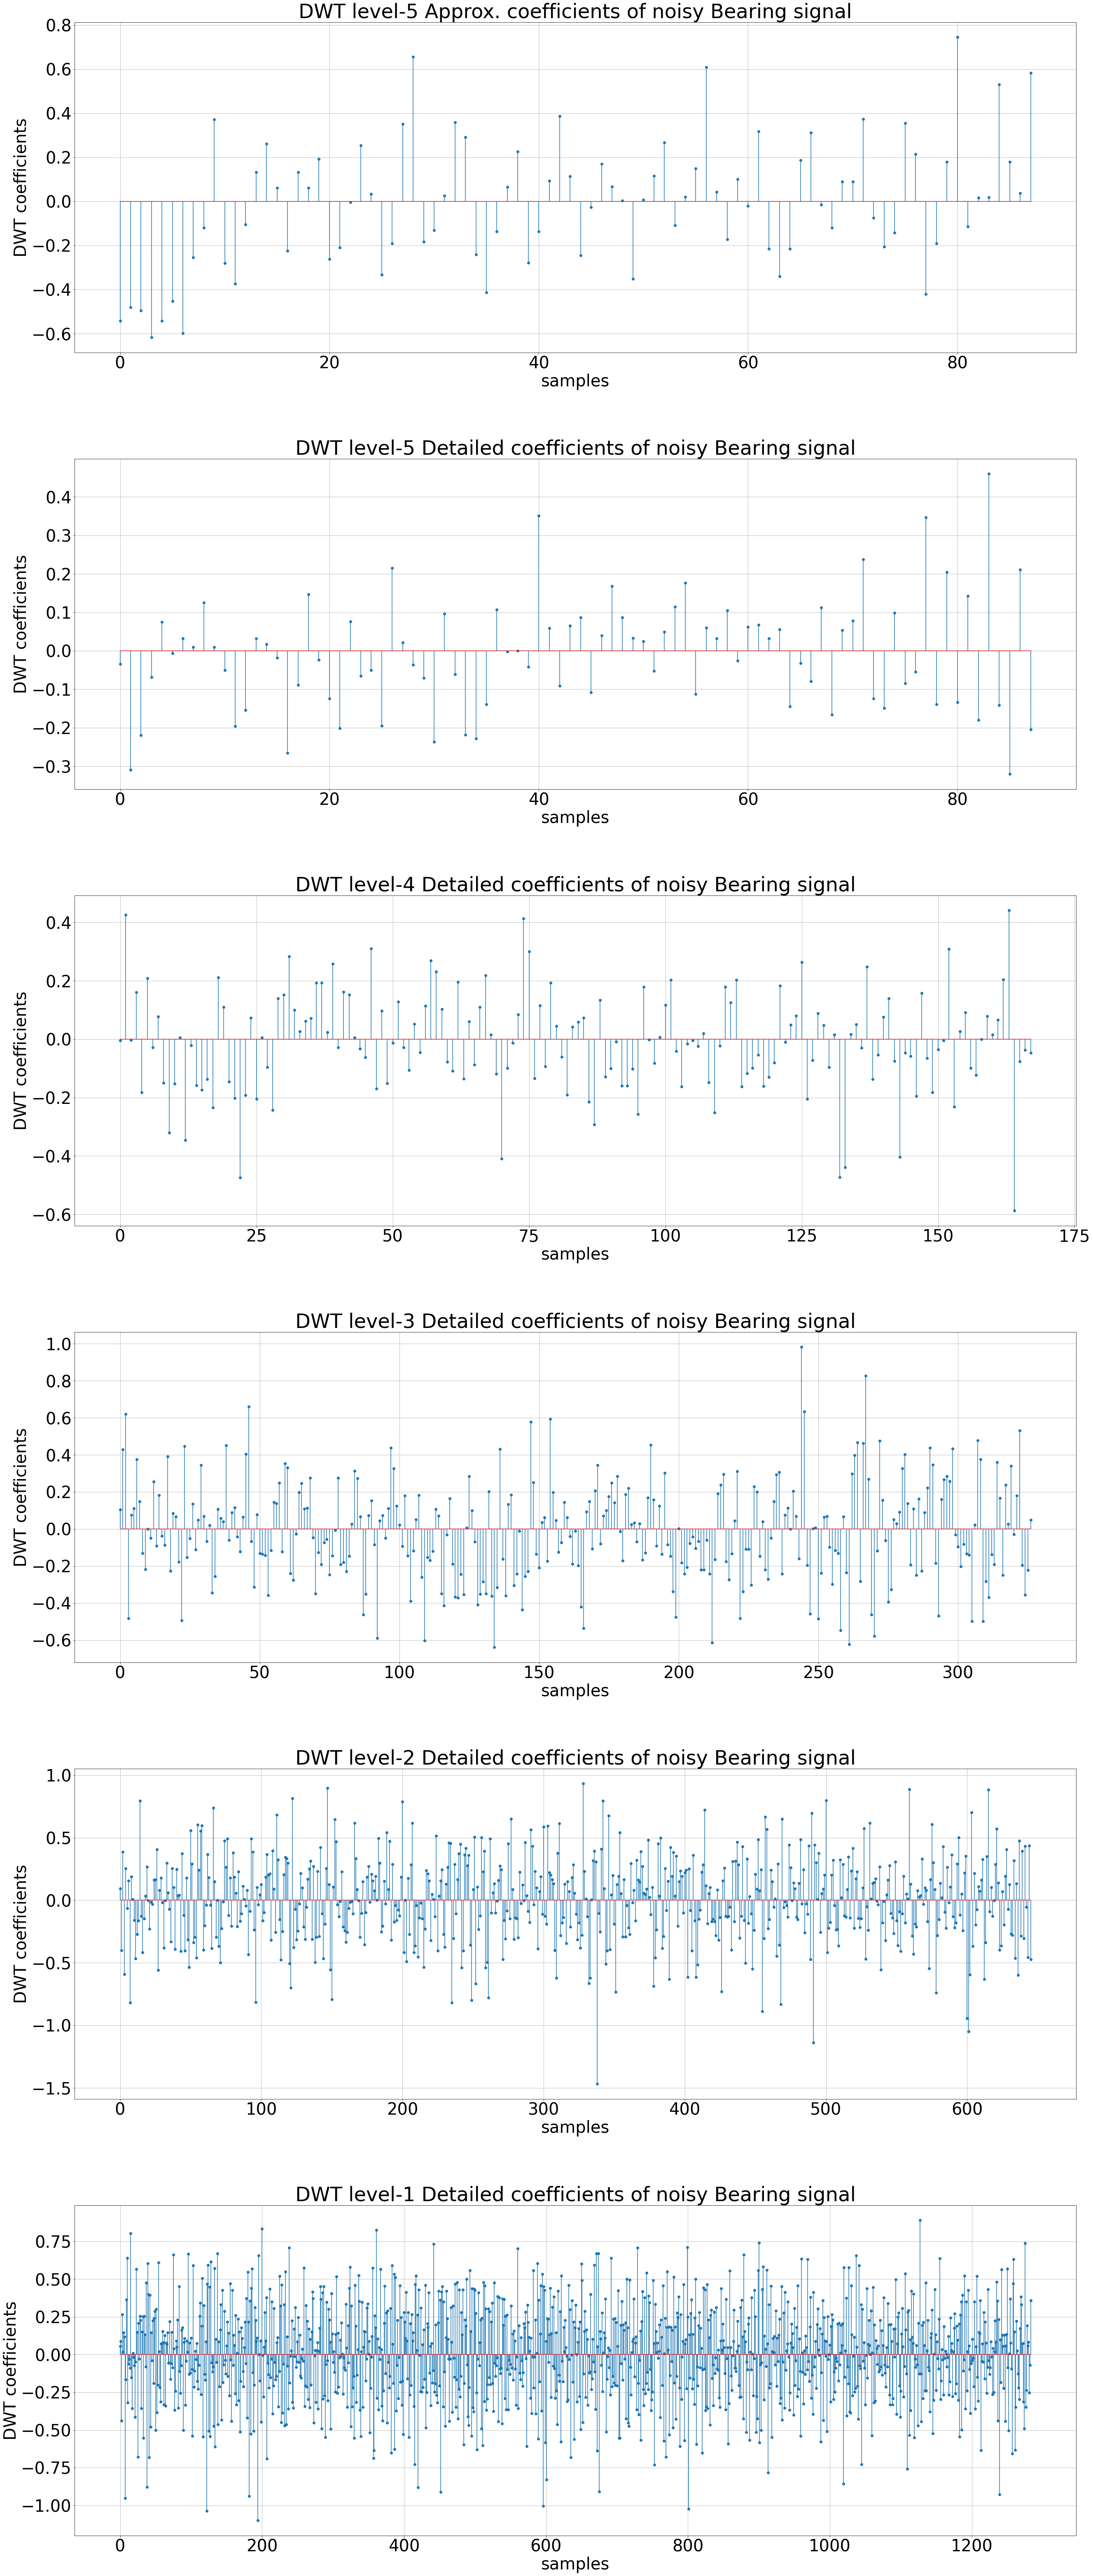

In [154]:
L = 5
coeffs = pywt.wavedec(sig, 'db5', level=L)

xvalues = []
titles = []
for i in range(L+1):
    temp_N = coeffs[i].size
    if i==0:
        temp_title = f'DWT level-{L-i} Approx. coefficients of noisy Bearing signal'
    else:
        temp_title = f'DWT level-{L-i+1} Detailed coefficients of noisy Bearing signal'
    xvalues.append(np.arange(temp_N))
    titles.append(temp_title)
    
    
matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(L+1,figsize=(40,90))
for i in range(L+1):
    ax[i].stem(xvalues[i],coeffs[i],use_line_collection=True)
    ax[i].set_xlabel('samples')
    ax[i].set_ylabel('DWT coefficients')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)

## (b) Perform the same operation using Moving Average Filter and compare the results.

Function definition of Moving average filter

In [155]:
def MA_filter(noisy_s,M):
    N = noisy_s.size
    filt_s = np.zeros(N)
    for i in range(M):
        filt_s[:M] = np.zeros(M)
    for i in range(M,N):
        temp_sum = 0
        for j in range(i-M+1,i+1):
            temp_sum += noisy_s[j]
        temp_mean = temp_sum/M
        filt_s[i] = temp_mean
    return filt_s

Calculating the threshold and thresholding the wavelet coefficients and reconstructing the signal from thresholded coefficients.
Applying the Moving average filter to get the filtered signal

In [156]:
sig_recon = []
coeff_d = coeffs[1]
for i in range(2,len(coeffs)):
    coeff_d = np.concatenate((coeffs[i],coeff_d))  
    
noise_sd = np.median(np.abs(coeff_d))/0.6745
noise_var = np.square(noise_sd)
coeff_th = prop_th(coeffs,noise_var,N,0.75,3)

sig_recon_wlt = np.round(pywt.waverec(coeff_th,'db5'),2)
sig_recon_MA = MA_filter(sig,20)

sig_recon.append(sig_recon_wlt)
sig_recon.append(sig_recon_MA)

Plotting the noisy bearing signal, reconstructed bearing signal after proposed thresholding and Moving average filtered signal

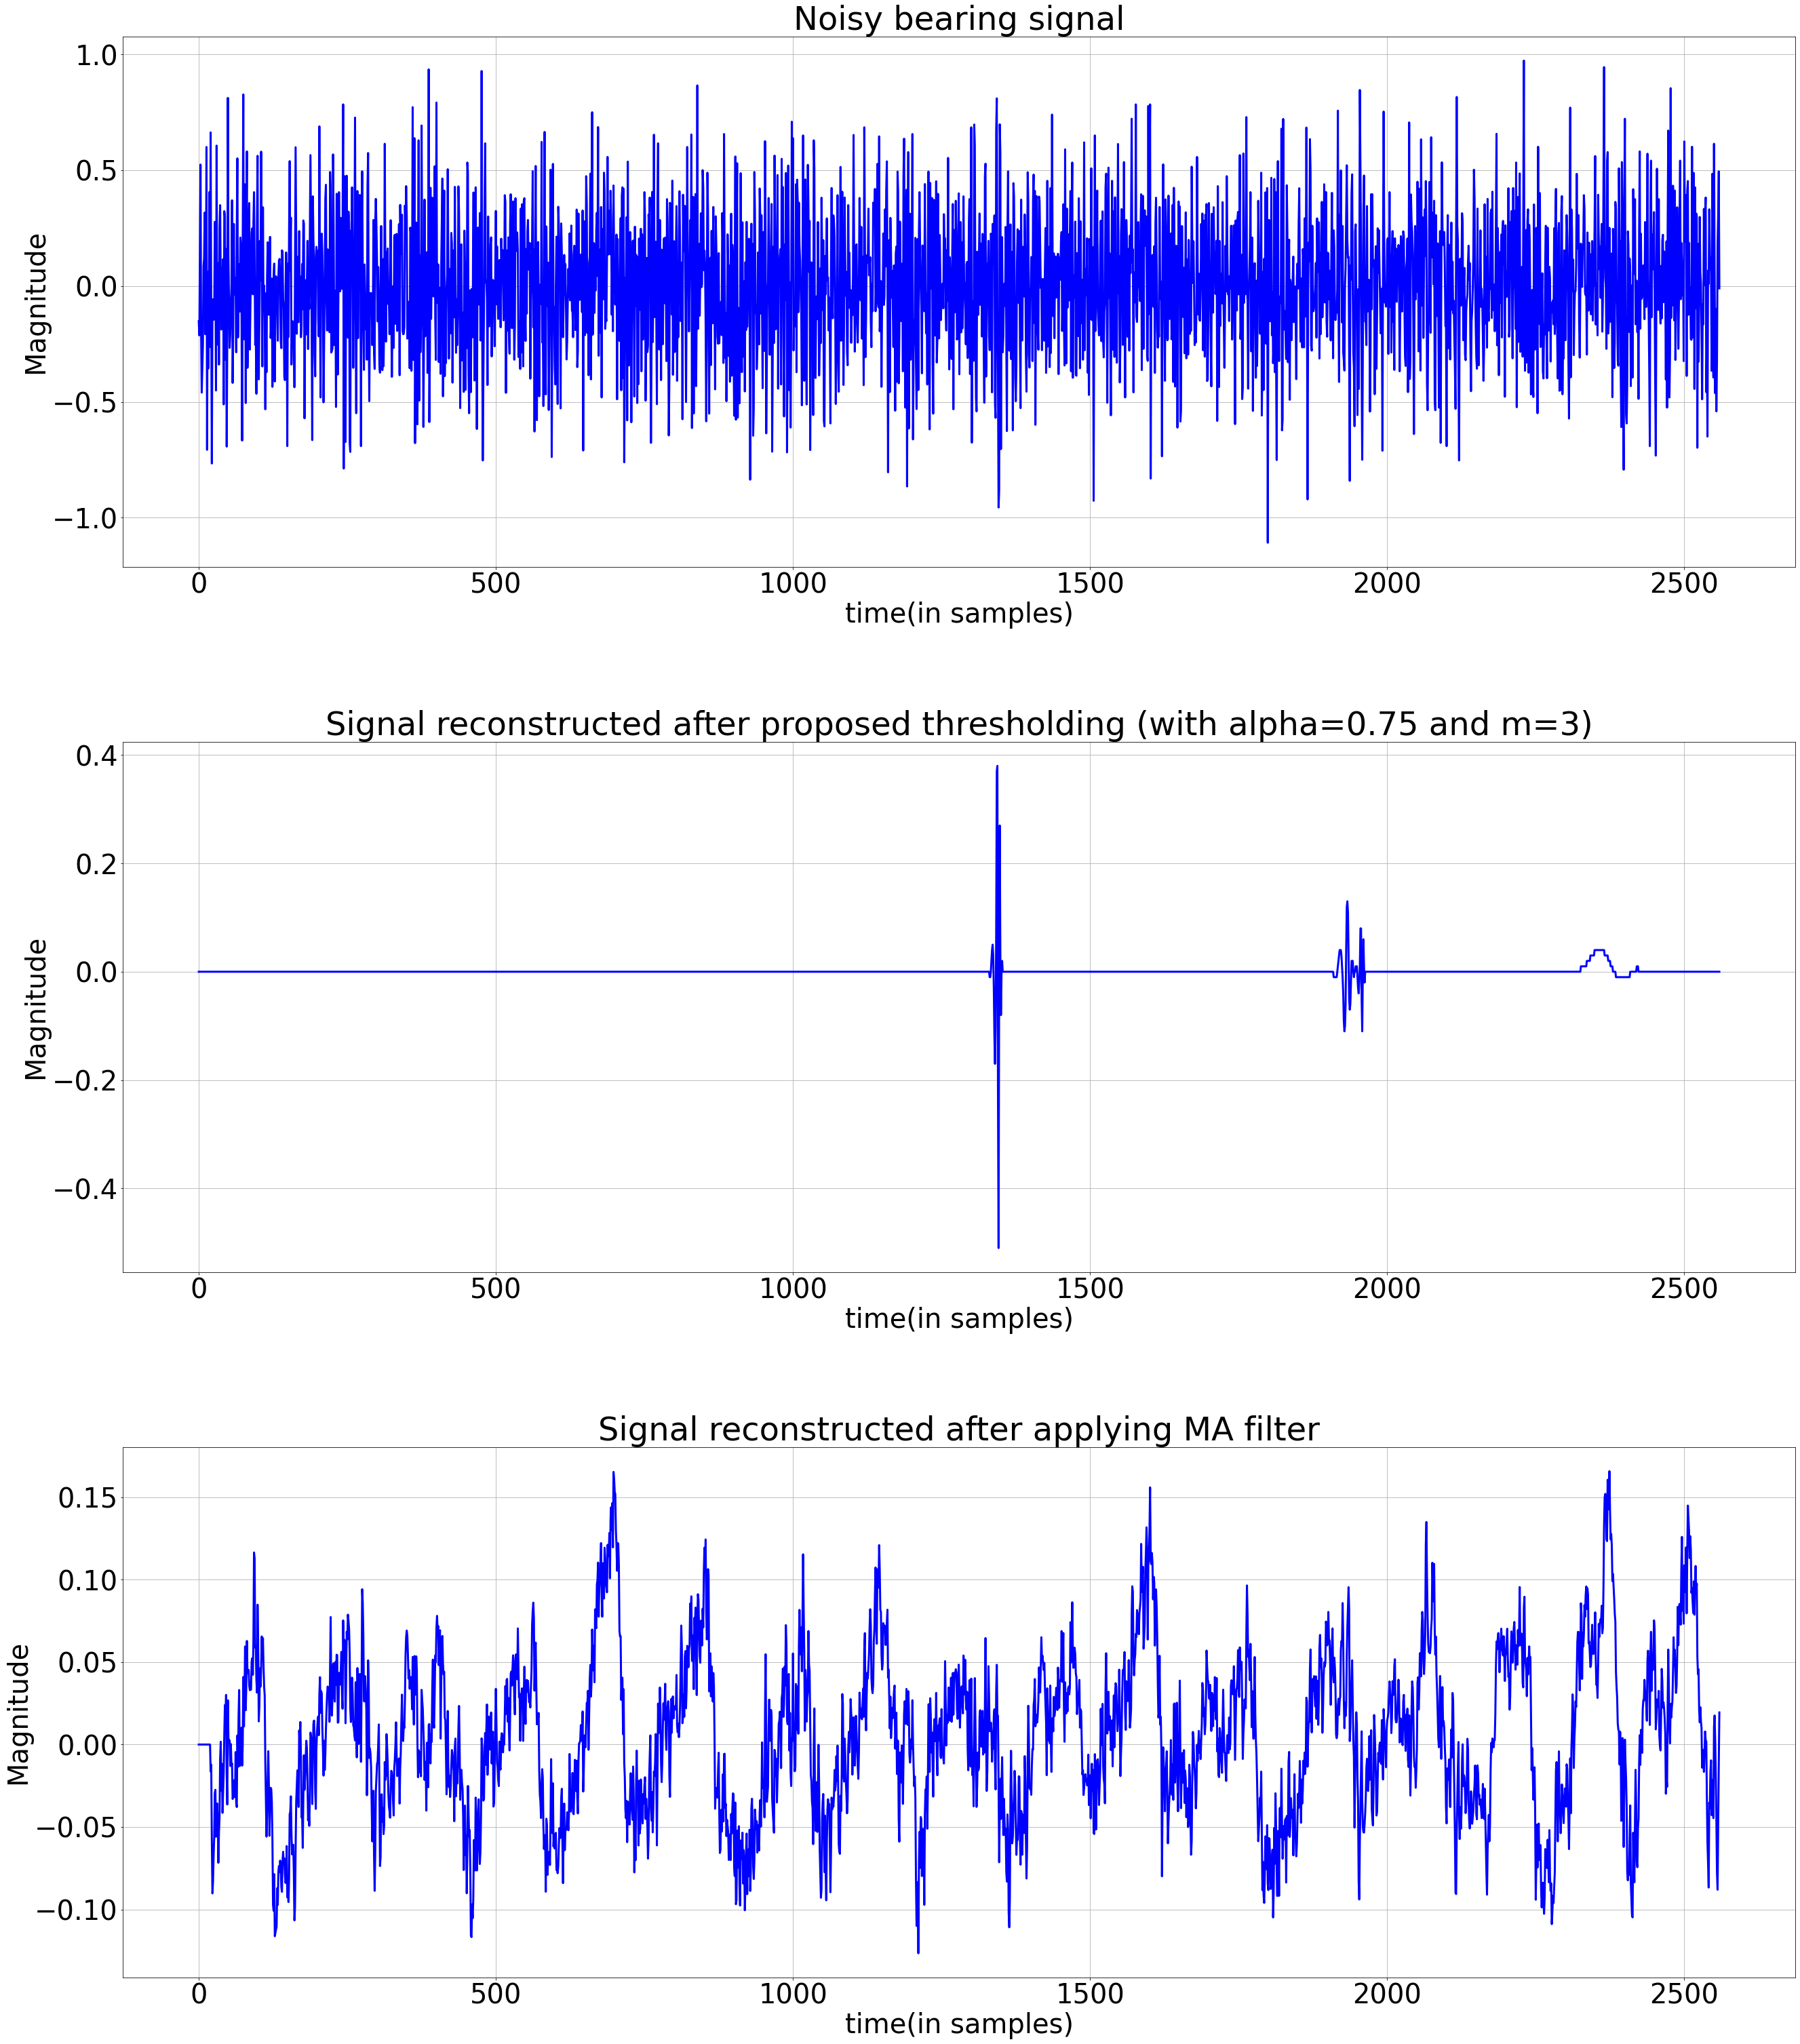

In [157]:
titles = ['Noisy bearing signal','Signal reconstructed after proposed thresholding (with alpha=0.75 and m=3)','Signal reconstructed after applying MA filter']


matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(len(titles),figsize=(40,45))

for i in range(len(titles)):
    if i==0:
        ax[i].plot(n,sig,color='b',lw=3)
    else:
        ax[i].plot(n,sig_recon[i-1],color='b',lw=3)
    ax[i].set_xlabel('time(in samples)')
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(titles[i])
    ax[i].grid()
fig.tight_layout(pad=3.0)